In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.vq import vq


In [3]:
data = pd.read_csv('./processed_data1.csv')
frac_data = data.sample(frac = 0.01) 


In [5]:
MEAN = data.mean()
STD = data.std()
normalized_data = (data - MEAN)/STD
normalized_frac_data = (frac_data - MEAN)/STD

correlation_matrix = normalized_frac_data.corr()

print(correlation_matrix)

day   weekday      hour  event_type  product_id  \
day           1.000000  0.033651 -0.009338    0.002374    0.049759   
weekday       0.033651  1.000000  0.017257    0.025205    0.001804   
hour         -0.009338  0.017257  1.000000   -0.006639    0.015598   
event_type    0.002374  0.025205 -0.006639    1.000000    0.022860   
product_id    0.049759  0.001804  0.015598    0.022860    1.000000   
category_id  -0.001737 -0.002382  0.000735   -0.023021    0.207092   
brand         0.002796 -0.011091  0.004339   -0.052274    0.257067   
price        -0.022401 -0.018238  0.000024   -0.143050   -0.079339   
user_id       0.672544  0.011714  0.008894   -0.081740    0.011884   
user_session  0.981379  0.043696  0.024899   -0.001975    0.046376   

              category_id     brand     price   user_id  user_session  
day             -0.001737  0.002796 -0.022401  0.672544      0.981379  
weekday         -0.002382 -0.011091 -0.018238  0.011714      0.043696  
hour             0.000735  0.004

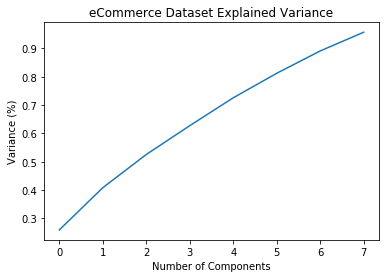

In [6]:
pca = PCA(random_state=1, n_components=8)
pca.fit(normalized_frac_data.values)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('eCommerce Dataset Explained Variance')
plt.show()

In [5]:
normalized_frac_data = pd.DataFrame(pca.transform(normalized_frac_data))

In [54]:
# calculate distortion for a range of number of cluster
max_clusters = 1000
distortions = []
for i in range(1, max_clusters):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1
    )
    km.fit(normalized_frac_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, max_clusters), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [36]:
# KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
).fit(data.values)


In [7]:
# KMeans - normalized data

km_norm = KMeans(
    n_clusters=20, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
).fit(normalized_frac_data.values)


In [9]:
# DBSCAN

db = DBSCAN(eps=0.5, min_samples=3).fit(data.values)
print(db.labels_)


[-1 -1 -1 ... -1 -1 -1]


In [8]:
# DBSCAN - normalized data
db_scan_model = DBSCAN(eps=0.5, min_samples=11)
db_norm = db_scan_model.fit(normalized_frac_data.values)
print(db_norm.labels_)

[-1 -1 -1 ... -1 -1 -1]


In [9]:
print(np.unique(db_norm.labels_))


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30]


In [26]:
print(np.unique(db_norm.labels_))
# SCORE

# km_score = davies_bouldin_score(data.values, km.labels_)
# dbscan_score = davies_bouldin_score(data.values, db.labels_)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53]


In [6]:
cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
hierachical = cluster.fit_predict(normalized_frac_data.values)

In [22]:
print(estimate_bandwidth(normalized_frac_data, n_jobs=-1))

3.6535416512790535


In [10]:
ms = MeanShift(bandwidth=1, n_jobs=-1).fit(normalized_frac_data.values)

print(np.unique(ms.labels_))


[   0    1    2 ... 5433 5434 5435]


In [6]:
ms = MeanShift(n_jobs=-1).fit(normalized_frac_data.values)

print(np.unique(ms.labels_))


[0 1 2]


In [8]:

data_with_cluster = pd.DataFrame(frac_data)
data_with_cluster["cluster"] = ms.labels_

data_with_cluster.to_csv("./clustered_data.csv")


In [28]:
# SCORE - normalized data

km_score_norm = davies_bouldin_score(normalized_frac_data.values, km_norm.labels_)
dbscan_score_norm = davies_bouldin_score(normalized_frac_data.values, db_norm.labels_)
# hierachical_score = davies_bouldin_score(normalized_frac_data.values, hierachical)
ms_score_norm = davies_bouldin_score(normalized_frac_data.values, ms.labels_)

In [13]:
# print("Scores - KM vs DBSCAN: ", km_score, dbscan_score)
print("Scores - KM, DBSCAN, meanscore, hierarchical: ", 
km_score_norm,
#  dbscan_score_norm,
  ms_score_norm,
#    hierachical_score
   )

Scores - KM, DBSCAN, meanscore, hierarchical:  1.700753663810015 0.732072821213012


In [40]:
print(np.unique(ms.labels_))


[   0    1    2 ... 1471 1472 1473]


In [45]:
corr_df = pd.DataFrame(normalized_frac_data)

corr_df["cluster"] = km_norm.labels_

print(corr_df.corr())



day   weekday      hour  event_type  product_id  \
day           1.000000  0.031277 -0.009018    0.024975    0.045357   
weekday       0.031277  1.000000  0.025513    0.010690    0.005020   
hour         -0.009018  0.025513  1.000000    0.001292    0.019688   
event_type    0.024975  0.010690  0.001292    1.000000    0.016734   
product_id    0.045357  0.005020  0.019688    0.016734    1.000000   
category_id  -0.001935  0.005347  0.000072   -0.033827    0.216483   
brand         0.013113 -0.014280 -0.008344   -0.068869    0.246980   
price        -0.009251 -0.024690 -0.008008   -0.151714   -0.079670   
user_id       0.660321  0.005154  0.016531   -0.061816    0.005796   
user_session  0.977823  0.038275  0.025639    0.020073    0.040047   
cluster      -0.090872  0.087730  0.199592    0.106577    0.155803   

              category_id     brand     price   user_id  user_session  \
day             -0.001935  0.013113 -0.009251  0.660321      0.977823   
weekday          0.005347 -0.014

In [7]:
X = data.values

y_km = kmForDisplay.fit_predict(X)


# plot the 2 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [6]:
# normalized_data = (data - data.mean())/data.std()
correlation_matrix = data.corr()

print(correlation_matrix)


Unnamed: 0  event_time  event_type  product_id  category_id  \
Unnamed: 0      1.000000    0.050844    0.004361   -0.004424    -0.019334   
event_time      0.050844    1.000000   -0.002662    0.002191    -0.011672   
event_type      0.004361   -0.002662    1.000000    0.010754    -0.009386   
product_id     -0.004424    0.002191    0.010754    1.000000     0.057845   
category_id    -0.019334   -0.011672   -0.009386    0.057845     1.000000   
brand          -0.018603   -0.004590   -0.060781    0.040810     0.082806   
price           0.001858   -0.007186   -0.149860   -0.020761     0.018617   
user_id        -0.013653   -0.013416   -0.073421   -0.012995     0.007603   
user_session    0.980394    0.049009   -0.001944   -0.006094    -0.018886   

                 brand     price   user_id  user_session  
Unnamed: 0   -0.018603  0.001858 -0.013653      0.980394  
event_time   -0.004590 -0.007186 -0.013416      0.049009  
event_type   -0.060781 -0.149860 -0.073421     -0.001944  
product

In [49]:
def denormalize_data(df:pd.DataFrame, mean, std):
    return (df*std) + mean
cent = pd.DataFrame(data=[ms.cluster_centers_[0]], columns=data.columns.values)
print(denormalize_data(cent, MEAN, STD))

day   weekday      hour  event_type   product_id  category_id  \
0  21.656397  3.740597  9.795138    0.558466  1333.635112    25.448805   

       brand     price       user_id   user_session  
0  20.018774  3.914953  182789.79867  402679.556172  


In [21]:

def assign_cluster(observations: pd.DataFrame, centroids: pd.DataFrame):
    codes, distances = vq(observations.values, centroids.values)
    result = pd.DataFrame.copy(observations)
    result["cluster"] = codes
    return result

In [48]:

print(np.unique(km_norm.labels_, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]), array([1085, 1468,  591, 1310, 1337, 1781, 1771, 1507, 1981, 1343, 1885,
        974, 1734, 1121, 1951,  583,  851, 1036, 1253,  936], dtype=int64))


In [45]:
obs = pd.DataFrame.copy(normalized_data)
centroids = pd.DataFrame(km_norm.cluster_centers_)
obs = assign_cluster(obs, centroids)


In [46]:
unique, counts = np.unique(obs["cluster"].values, return_counts=True)
print(unique, counts)
print(unique.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [101896 149280  57879 137644 133467 172457 175506 156041 201776 140153
 184658  98370 167527 107383 194179  60065  83178 105926 128397  94026]
(20,)


In [51]:
tmp = pd.DataFrame([counts], columns=unique)

In [52]:
print(tmp)

0       1      2       3       4       5       6       7       8   \
0  101896  149280  57879  137644  133467  172457  175506  156041  201776   

       9       10     11      12      13      14     15     16      17  \
0  140153  184658  98370  167527  107383  194179  60065  83178  105926   

       18     19  
0  128397  94026  


In [60]:
print(data["price"].min())

0.0


In [49]:
data_with_cluster = pd.DataFrame.copy(data)
data_with_cluster["cluster"] = obs["cluster"]
data_with_cluster.to_csv("processed_data_with_cluster.csv", index=False)

In [105]:
def print_statistic(df: pd.DataFrame, cluster_value:int):
    dfc = df[df["cluster"] == cluster_value]
    event_types, event_ocurences = np.unique(dfc["event_type"].values, return_counts=True)
    print("event_type occurences")
    print(pd.DataFrame([event_ocurences], columns=event_types))
    brand_types, brand_occurences = np.unique(dfc["brand"].values, return_counts=True)
    brand_sorted = np.argsort(-brand_occurences)
    print("brand occurences")
    print(pd.DataFrame([brand_occurences[brand_sorted[0:5]]], columns=brand_types[brand_sorted[0:5]]))
    min_price = dfc["price"].min()
    average_price = dfc["price"].mean()
    max_price = dfc["price"].max()
    print(pd.DataFrame(data=[[min_price, average_price, max_price]], columns=["min", "average", "max"]))

    print("min price by event type")
    print(dfc[["event_type", "price"]].groupby(["event_type"]).agg(['min', 'mean', 'max']))
    # print("max price by event type")
    # print(dfc[["event_type", "price"]].groupby(["event_type"]).nlargest(n=5, columns=["price"]))

    # print("min price by brand type")
    # print(dfc[["brand", "price"]].groupby(["brand"]).nsmallest(n=5, columns=["price"]))
    # print("max price by brand type")
    # print(dfc[["brand", "price"]].groupby(["brand"]).nlargest(n=5, columns=["price"]))


In [106]:
sub_df = data_with_cluster[["event_type", "brand", "price", "cluster"]]
print_statistic(sub_df, 0)

event_type occurences
       0      1     2      3
0  45779  32822  8531  14764
brand occurences
      2      8     25    55    56
0  13765  11716  7378  5033  4401
   min   average    max
0  0.1  5.588359  86.67
min price by event type
           price                 
             min      mean    max
event_type                       
0            0.1  7.085731  86.67
1            0.1  4.299868  86.67
2            0.1  4.008187  71.27
3            0.1  4.722951  71.27


In [92]:
print(pd.__version__)

0.25.1
